In [163]:
import numpy as np
import matplotlib.pyplot as plt


class CosineSimilarityAVLTree:
    qid2pids = {}
    pid_min = 7
    pid_max = 32
    pid_num = pid_max - pid_min + 1
    pid_list_base = [False for i in range(pid_num)]
    qid2node = {}

    class Node:
        def __init__(self, data, parent = 0):
            self.left = None
            self.right = None
            self.height = 1
            self.qid = data
            self.parent = parent

        def __int__(self):
            return self.qid
        
    def build(self, qids, threshold):
        self.threshold = threshold
        self.root = None
        for qid in qids:
            self.root = self.insert(self.root, int(qid))
        
    def height(self, node):
        if node is None:
            return 0
        return node.height
    
    def get_balance_factor(self, node):
        if node is None:
            return 0
        return self.height(node.left) - self.height(node.right)
    
    def right_rotate(self, y):
        x = y.left
        t = x.right
        
        x.right = y
        if y is not None:
            y.parent = x
        y.left = t
        if t is not None:
            t.parent = y
        
        y.height = 1 + max(self.height(y.left), self.height(y.right))
        x.height = 1 + max(self.height(x.left), self.height(x.right))
        
        return x
    
    def left_rotate(self, x):
        y = x.right
        t = y.left
        
        y.left = x
        if x is not None:
            x.parent = y
        x.right = t
        if t is not None:
            t.parent = x
        
        x.height = 1 + max(self.height(x.left), self.height(x.right))
        y.height = 1 + max(self.height(y.left), self.height(y.right))
        
        return y
    
    def insert(self, node, qid):
        if node is None:
            n = self.Node(qid)
            self.qid2node[str(qid)] = n
            return n
        
        cosine_similarity = self.calculate_cosine_similarity(qid, node.qid)
        if cosine_similarity < self.threshold:
            node.right = self.insert(node.right, qid)
            node.right.parent = node
        else:
            node.left = self.insert(node.left, qid)
            node.left.parent = node
        
        node.height = 1 + max(self.height(node.left), self.height(node.right))
        
        balance_factor = self.get_balance_factor(node)
        
        if balance_factor > 1:
            if self.calculate_cosine_similarity(qid, node.left.qid) < self.threshold:
                node.left = self.left_rotate(node.left)
            return self.right_rotate(node)
        
        if balance_factor < -1:
            if self.calculate_cosine_similarity(qid, node.right.qid) > self.threshold:
                node.right = self.right_rotate(node.right)
            return self.left_rotate(node)
        
        self.root.parent = None
        
        return node
    
    def calculate_cosine_similarity(self, qid1, qid2):
        if qid1 == 0 or qid2 == 0 or qid1 is None or qid2 is None:
            return 0
        qid1, qid2 = str(qid1), str(qid2)
        
        a_o = self.qid2pids[qid1]
        b_o = self.qid2pids[qid2]

        a_p = self.pid_list_base.copy()
        b_p = self.pid_list_base.copy()

        for i in a_o:
            a_p[i - self.pid_min] = True
        for i in b_o:
            b_p[i - self.pid_min] = True

        a = np.asarray(a_p)
        b = np.asarray(b_p)

        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        return dot_product / (norm_a * norm_b)
    
    def search(self, target):
        return self.search_node(self.root, target)
    
    def search_node(self, node, target):
        if node is None:
            return None
        if np.array_equal(node.qid, target):
            return node
        cosine_similarity = self.calculate_cosine_similarity(target, node.qid)
        if cosine_similarity >= self.threshold:
            return self.search_node(node.left, target)
        else:
            return self.search_node(node.right, target)
        
    def plot(self):
        plt.figure()
        self.plot_node(self.root, 0, 1000, 0)
        plt.axis('off')
        plt.show()
        
    def plot_node(self, node, x_start, x_end, y_start):
        if node is None:
            return
        x = (x_start + x_end) / 2
        y = y_start + 2
        plt.plot(x, y_start, 'ko', markersize=5) # 在画面上方中央画Root

        plt.text(x, y_start + 0.2, str(node.qid))

        if node.left is not None:
            self.plot_node(node.left, x_start, x, y)
            plt.plot([x, (x+x_start) / 2], [y_start, y], linewidth=2, color='r') #(x, y_start)到((x+x_start)/2, y)
        if node.right is not None:
            self.plot_node(node.right, x, x_end, y)
            plt.plot([x, (x+x_end) / 2], [y_start, y], linewidth=2, color='g')#(x, y_start)到((x+x_end)/2, y)

    def getMostSimilar(self, qid):
        node = self.qid2node[str(qid)]
        ns = [node.left, node.right, node.parent]
        qids = [(n.qid if n is not None else 0) for n in ns]
        similar = [self.calculate_cosine_similarity(q, qid) for q in qids]
        tmp = max(similar)
        t = ns[similar.index(tmp)]
        if t is None:
            return max(qids)
        return t.qid



C:\Users\10130\AppData\Local\Temp\ipykernel_12112\614483206.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 26 + 1) instead
  li = np.random.randint(tree.pid_min, tree.pid_max, np.random.random_integers(tree.pid_num))


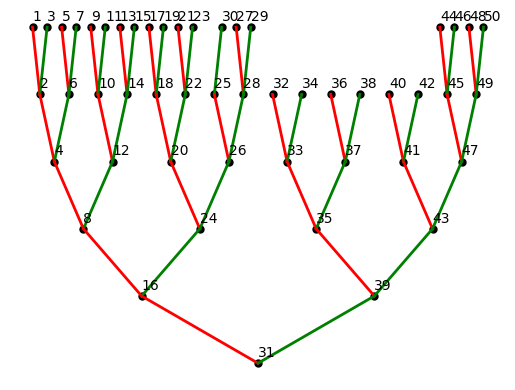

In [164]:
# Generate random data
num_samples = 50

tree = CosineSimilarityAVLTree()
data_dimension = tree.pid_num
# data = np.random.randn(num_samples, data_dimension)

for qid in range(1, num_samples + 1):
    li = np.random.randint(tree.pid_min, tree.pid_max, np.random.random_integers(tree.pid_num))
    tree.qid2pids[str(qid)] = list(set(li))

# np.insert(data, 0, [0 for i in range(data_dimension)])

# Generate random threshold
threshold = 0.5

# # Print generated data
# print("Data:")
# print(data)
# print("Targets:")
# print(targets)
# print("Threshold:", threshold)
qids = [int(i) for i in tree.qid2pids]

tree.build(threshold)


tree.plot()

In [165]:
import pickle

p = pickle.dumps(tree)

with open("p", "wb") as file:
    file.write(p)

